#### 📊 EDA - Exploratory Data Analysis for Credit Risk Modeling (Jupyter Notebook)

In [3]:
# 📊 EDA - Exploratory Data Analysis for Credit Risk Modeling (Jupyter Notebook)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

In [9]:
# Load data
df_data = pd.read_csv("../data/raw/data.csv")

In [6]:
df_xente = pd.read_csv('../data/raw/Xente_Variable_Definitions.csv', encoding='latin1')


In [10]:
df_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [11]:
df_xente.head()

,Column Name,Definition
0,TransactionId,Unique ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½transactio
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


In [14]:
print(len(df_data))


95662


In [15]:
#category
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [16]:
# Separate numerical, categorical and date columns
df_data_cat = df_data[['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']]

df_data_num = df_data[['Amount', 'Value']]

df_data_date = df_data[['TransactionStartTime']]

In [29]:
def summarize_time_series(df, date_column):
    # Create a copy
    df_copy = df.copy()

    # Convert to datetime
    df_copy[date_column] = pd.to_datetime(df_copy[date_column])

    # Remove timezone for easy processing
    df_copy['dt_no_tz'] = df_copy[date_column].dt.tz_localize(None)

    # Compute summary
    min_date = df_copy['dt_no_tz'].min()
    max_date = df_copy['dt_no_tz'].max()
    num_unique_timestamps = df_copy['dt_no_tz'].nunique()
    num_unique_days = df_copy['dt_no_tz'].dt.date.nunique()
    date_range_days = (max_date - min_date).days

    # Print results
    print(f"Number of unique timestamps: {num_unique_timestamps}")
    print(f"Number of unique calendar days: {num_unique_days}")
    print(f"Start Date: {min_date}")
    print(f"End Date: {max_date}")
    print(f"Date range in days: {date_range_days}")


In [30]:
summarize_time_series(df_data_date, 'TransactionStartTime')


Number of unique timestamps: 94556
Number of unique calendar days: 91
Start Date: 2018-11-15 02:18:49
End Date: 2019-02-13 10:01:28
Date range in days: 90


In [26]:
# 📝 Task 1: Overview of the data
print("Data shape:", df_data.shape)
df_data.info()
print("\nFirst five rows:\n", df_data.head())

Data shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  


In [32]:
# Display the number of rows and columns
num_rows, num_cols = df_data.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 95662
Number of columns: 16


In [33]:
# Display the data types of each column
print('\nData types of each column:')
print(df_data.dtypes)


Data types of each column:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [34]:
#Generate summary statistics
summary_statistics = df_data.describe(include='all')  # Include all columns (numeric and categorical)

In [35]:
#Select only numeric columns
numeric_df = df_data.select_dtypes(include='number')
#Calculate additional statistics
central_tendency = {
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Standard Deviation': numeric_df.std(),
    'Variance': numeric_df.var(),
    'Skewness': numeric_df.skew(),
    'Kurtosis': numeric_df.kurtosis()
}

# Step 6: Convert the dictionary to a DataFrame
central_tendency_df = pd.DataFrame.from_dict(central_tendency)
# Transpose the DataFrame for better readability
central_tendency_df = central_tendency_df.transpose()

In [36]:
# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN             NaN   
std                     NaN            NaN             NaN   
min                     NaN            NaN             NaN   
25%                     NaN            NaN             NaN   
50%                     NaN            NaN             NaN   
75%                     NaN            NaN             NaN   
max                     NaN            NaN             NaN   

             SubscriptionId       CustomerId CurrencyCode  CountryCode  \
count                 95662            95662        95662      95662.0   
unique                 3627             3742            1          NaN   
top     Subsc

In [24]:
# Display data types and non-null counts
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [37]:
print("\nCentral Tendency and Dispersion Statistics:")
print(central_tendency_df)


Central Tendency and Dispersion Statistics:
                    CountryCode        Amount         Value  PricingStrategy  \
Mean                      256.0  6.717846e+03  9.900584e+03         2.255974   
Median                    256.0  1.000000e+03  1.000000e+03         2.000000   
Standard Deviation          0.0  1.233068e+05  1.231221e+05         0.732924   
Variance                    0.0  1.520457e+10  1.515905e+10         0.537178   
Skewness                    0.0  5.109849e+01  5.129109e+01         1.659057   
Kurtosis                    0.0  3.363128e+03  3.378069e+03         2.087534   

                    FraudResult  
Mean                   0.002018  
Median                 0.000000  
Standard Deviation     0.044872  
Variance               0.002013  
Skewness              22.196295  
Kurtosis             490.685762  


In [15]:
# Show first few rows to understand structure
print("\nFirst five rows:\n", df_data.head())


First five rows:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Valu

In [27]:
# 📝 Task 2: Summary statistics,Display summary statistics to understand central tendency, dispersion, and shape

print("\nSummary statistics:\n", df_data.describe())


Summary statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


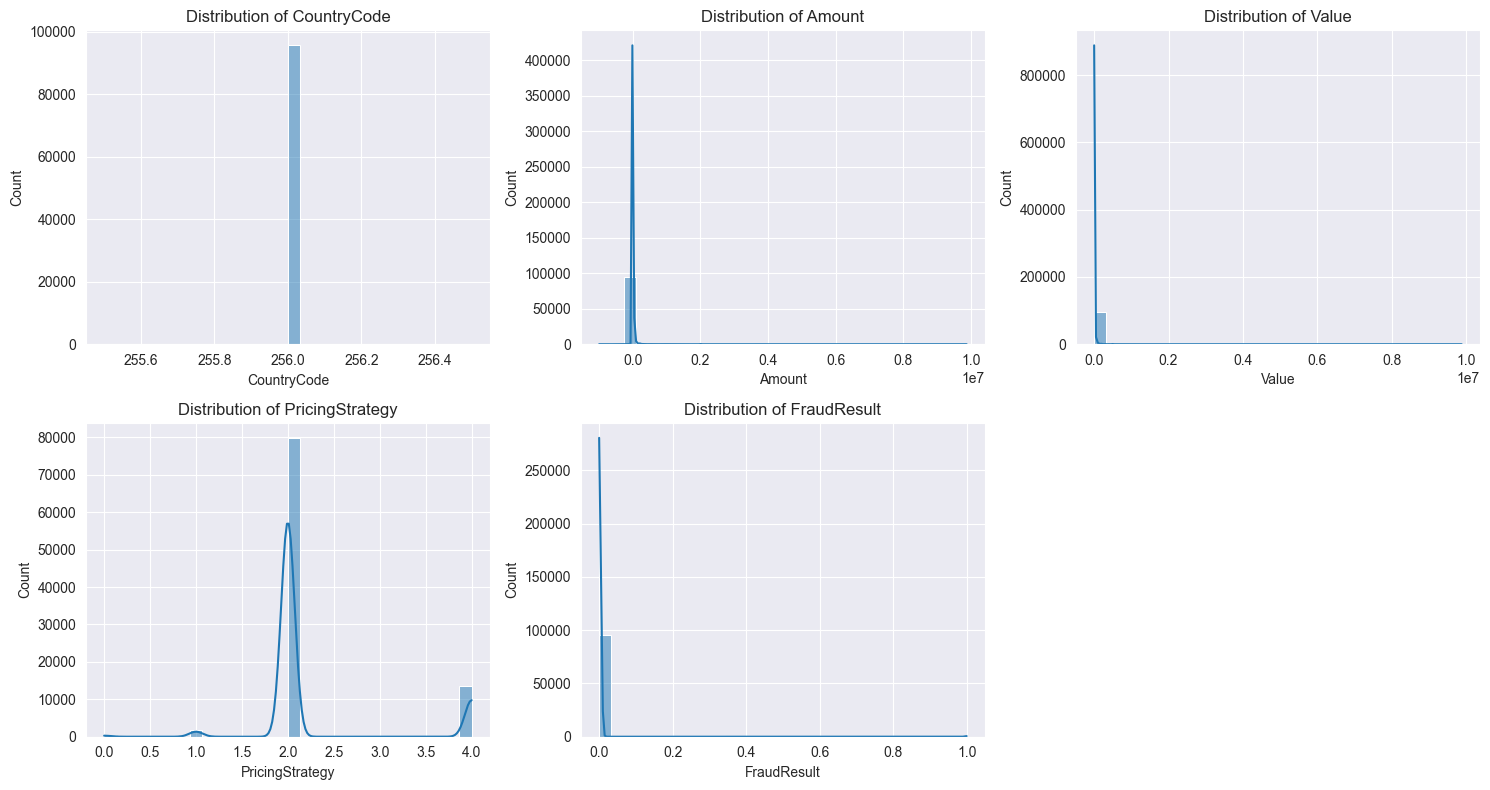

In [28]:
# 📝 Task 3: Distribution of numerical features
numerical_cols = df_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

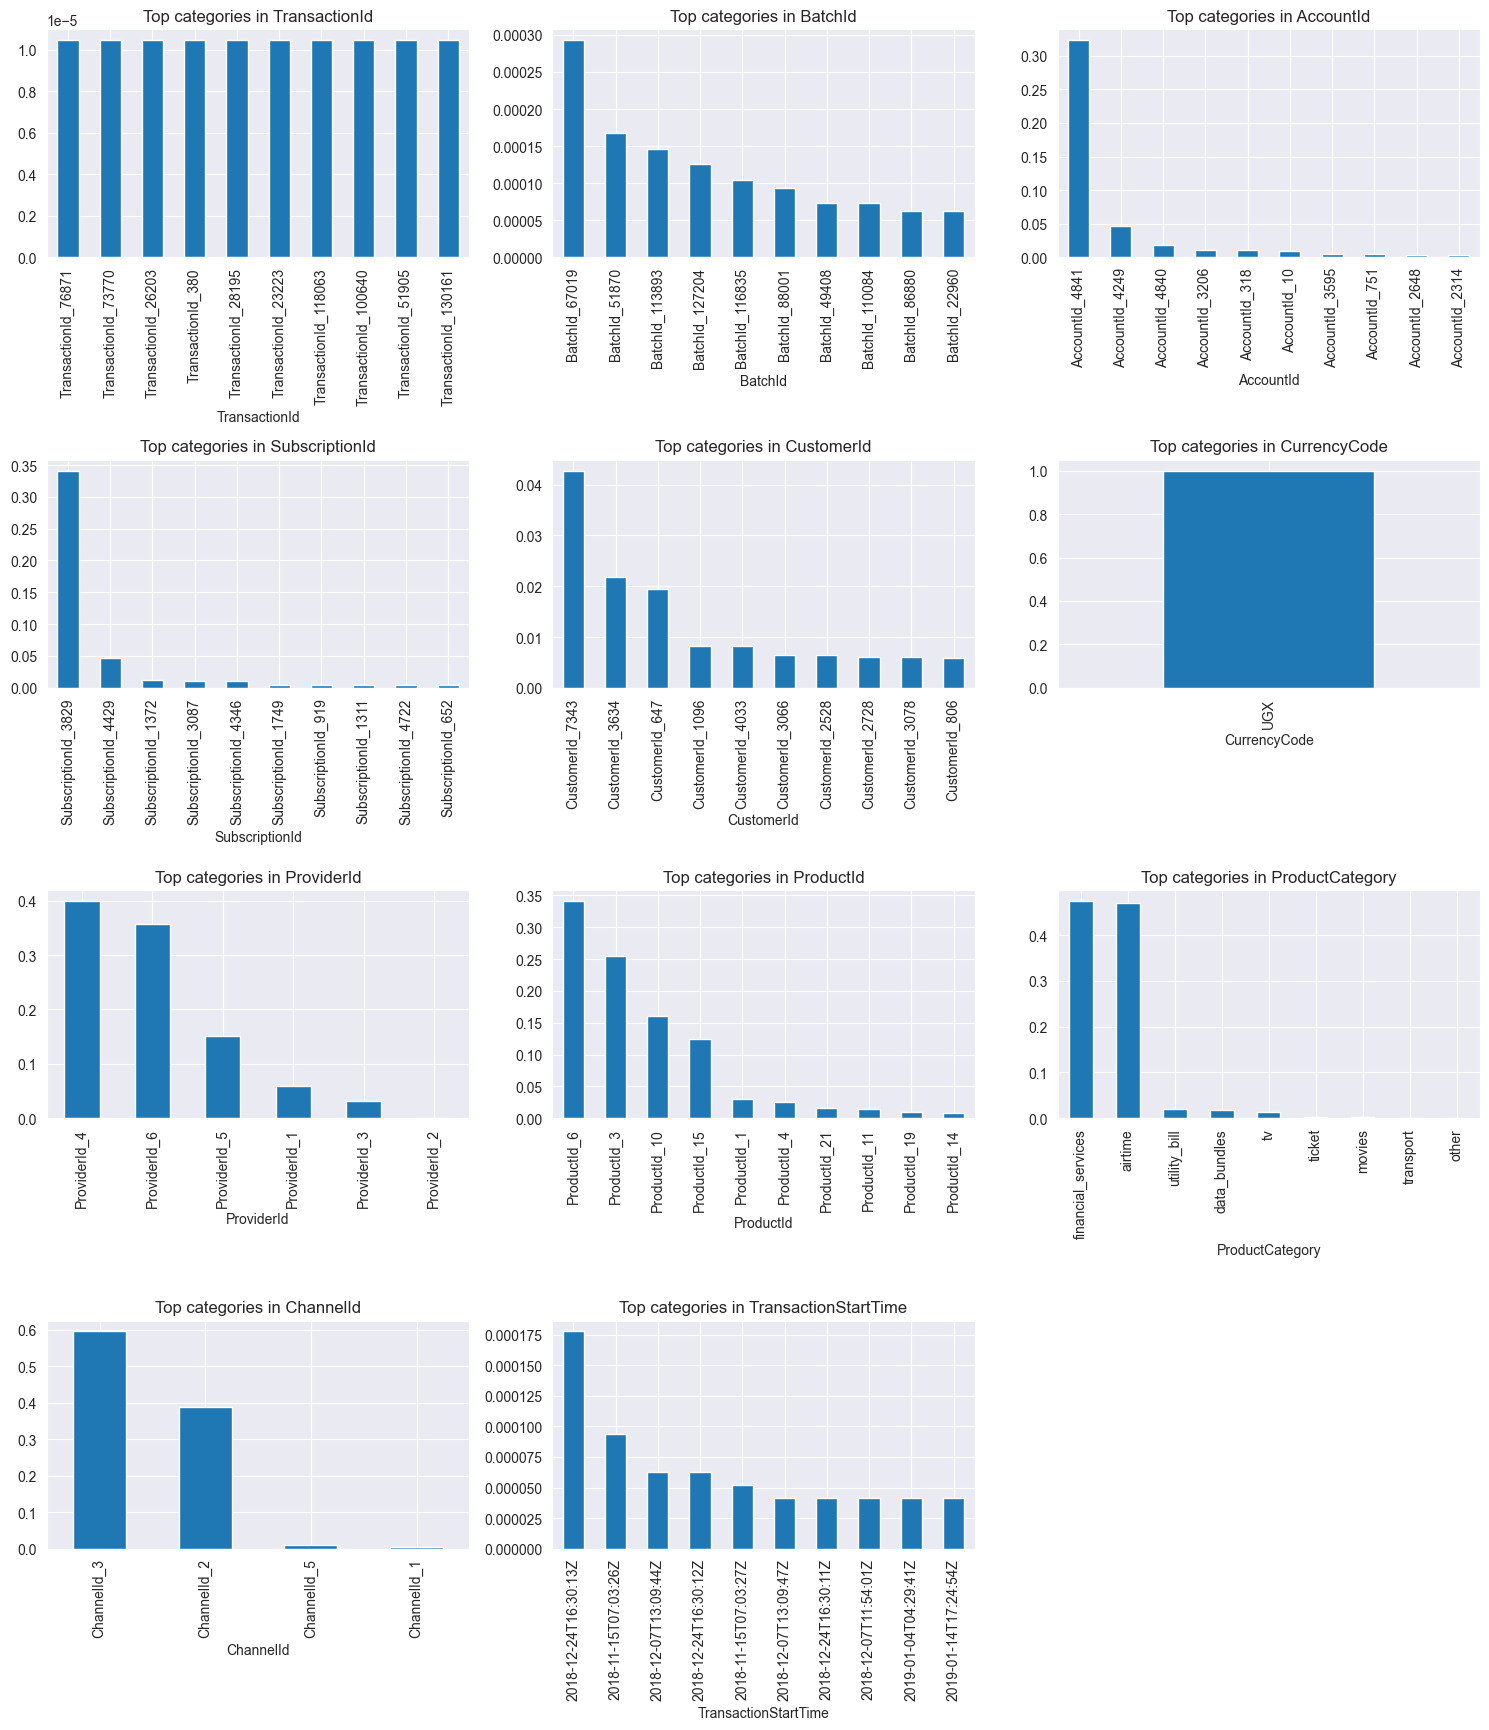

In [7]:
# 📝 Task 4: Distribution of categorical features
categorical_cols = df_data.select_dtypes(include='object').columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i+1)
    df_data[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(f'Top categories in {col}')
plt.tight_layout()
plt.show()

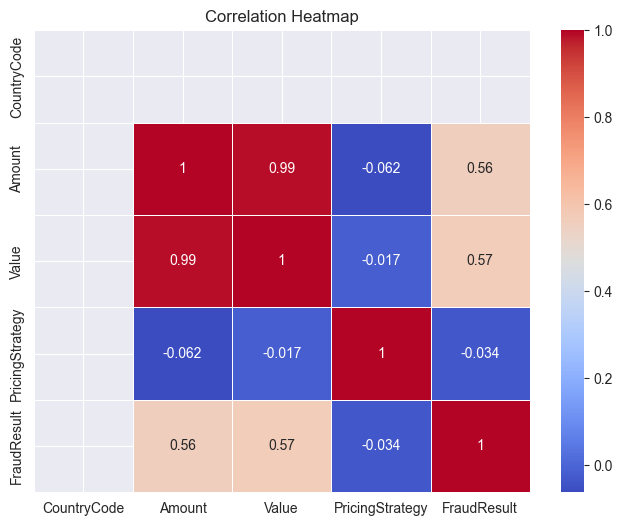

In [8]:
# 📝 Task 5: Correlation analysis
plt.figure(figsize=(8, 6))
corr_matrix = df_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [9]:
# 📝 Task 6: Identifying missing values
missing_values = df_data.isnull().sum()
print("\nMissing values per column:\n", missing_values)



Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


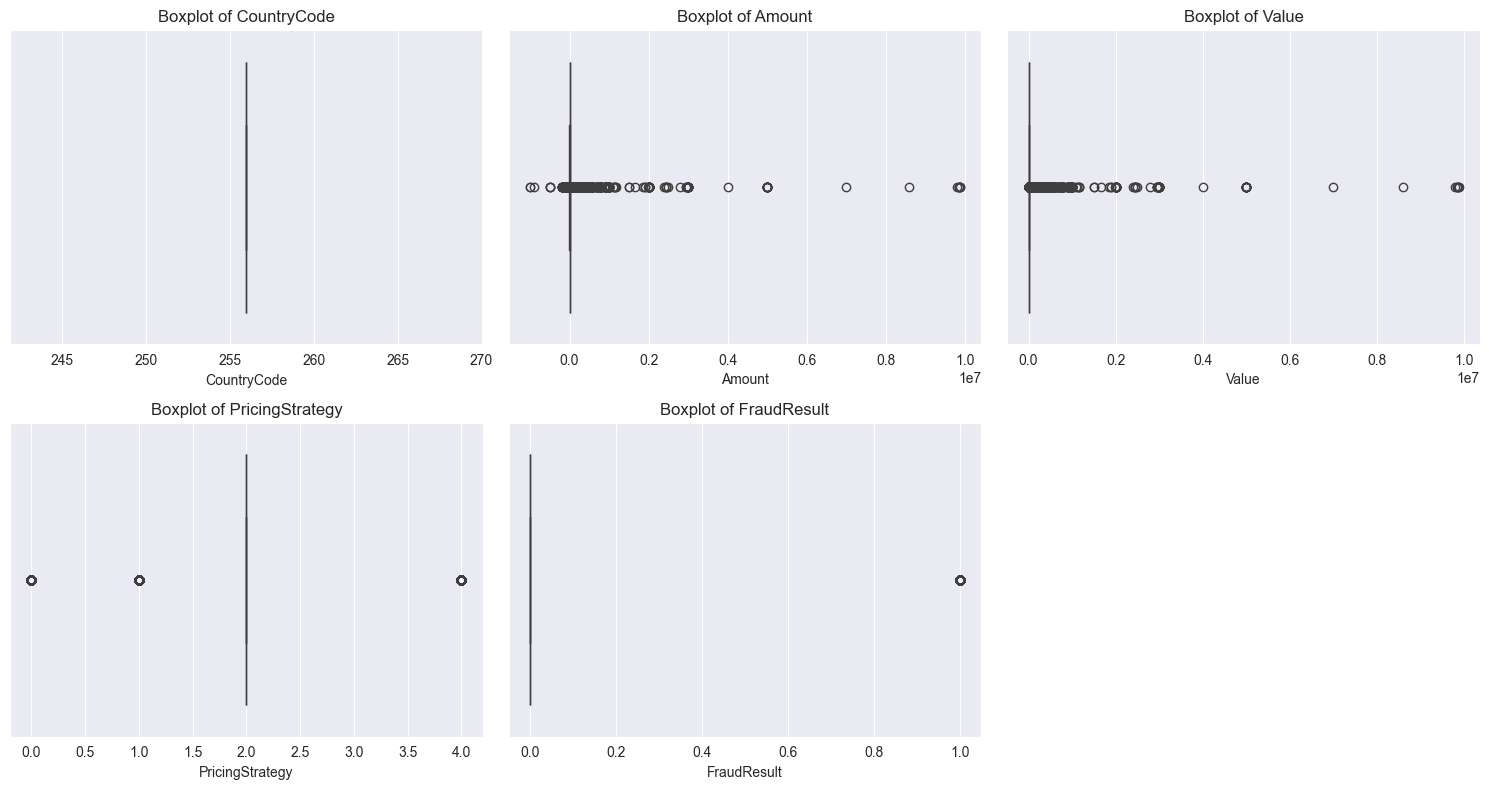

In [10]:
# 📝 Task 7: Outlier detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [11]:
# 📌 Top 3–5 EDA Insights:
print("""
1️⃣ Data is highly imbalanced: fraud cases ~0.2%.
2️⃣ Strong correlation between Amount and Value; may keep one or derive new features.
3️⃣ Extreme outliers detected in Amount and Value.
4️⃣ Categorical features are dominated by few top categories.
5️⃣ No missing values found.
""")



1️⃣ Data is highly imbalanced: fraud cases ~0.2%.
2️⃣ Strong correlation between Amount and Value; may keep one or derive new features.
3️⃣ Extreme outliers detected in Amount and Value.
4️⃣ Categorical features are dominated by few top categories.
5️⃣ No missing values found.

